### Introduction:
Swire Coca-Cola is a major bottling partner of The Coca-Cola Company in the Western United States, operating 6 production plants across 13 states. These plants support the distribution, marketing, and production of Coca-Cola products.

### Problem Statement:
As the primary bottler in this region, Swire Coca-Cola's operational efficiency directly affects the entire distribution network. Despite achieving a mechanical efficiency of 94%, the company faces significant downtime due to unforeseen machine breakdowns and inadequate predictive maintenance. These inefficiencies result in an estimated annual loss of $60 million in uncaptured revenue. The current maintenance process, which involves issuing work orders, waiting for parts, and making repairs, lacks proactive planning to prevent extended production stoppages, ultimately impacting overall plant performance.

This project aims to explore the factory line maintenance data to identify patterns in machine downtimes and evaluate the effectiveness of maintenance activities. By conducting Exploratory Data Analysis (EDA), we hope to uncover key insights into what drives downtime and provide recommendations for improving operational efficiency.

As we perform EDA on this dataset, we will be exploring relationships with the target variable, MAINTENANCE_PLAN, which is essentially the column that tells us if the maintenance was planned or not.

### Questions to guide exploration:
- How many null values are present in the data set?
- How many unique values are present in each column?
- What is the current distribution of planned vs. unplanned maintenance?
- What types of maintenance activities are most common?
- Are there any plants that are more likely to perform planned maintenance?
- What does the overall maintenance activity look like across plants (both planned and unplanned)?
- Is there a difference in the amount of time it takes to perform maintenence planned vs unplanned?
- How do maintenance times vary by equipment type?
- Is there a relationship between equipment description and the frequency of planned maintenance?
- Is there a relationship between equipment description and the frequency of unplanned maintenance?
- Are there any machines in particular that are more likely to recieve unplanned maintenence?
- Are there specific production lines or areas that experience more frequent unplanned maintenance?
- Are more frequently maintained machines less likely to require unplanned maintenance?
- Does older equipment experience more unplanned downtime?

In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [10]:
# Read the CSV directly from the URL
df = pd.read_csv('IWC_Work_Orders_Extract.csv')

df.head()

/var/folders/4l/0tw9tkvj2gx_v0qrnty9rt0r0000gn/T/ipykernel_38553/2253241213.py:2: DtypeWarning: Columns (8,11,12,13,14,15,16,17,18,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('IWC_Work_Orders_Extract.csv')


,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_PLAN,MAINTENANCE_ITEM,...,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO
0,705642457,G812,ROMA,2024-05-04,2024-05-12,06:00:00.000,23:04:08.000,390.0,NaN,NaN,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
1,704191697,G812,ROMA,2022-09-13,2022-09-13,06:00:00.000,17:17:24.000,420.0,NaN,NaN,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
2,704466547,G812,ROMA,2022-12-21,2022-12-21,07:00:00.000,07:00:00.000,30.0,NaN,NaN,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
3,703834477,G812,ROMA,2022-07-04,2022-07-04,06:00:00.000,06:00:00.000,60.0,NaN,NaN,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
4,704661125,G291,MONZA,2023-03-15,2023-03-15,07:00:00.000,07:00:00.000,120.0,NaN,NaN,...,AIR SYSTEMS,NaN,NaN,NaN,300001088.0,TANK_STL_STOR_AIR,Machines,2017-02-15,2023-12-11,9999-12-31


## Initial EDA

In [11]:
# info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427264 entries, 0 to 1427263
Data columns (total 25 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   ORDER_ID                         1427264 non-null  int64  
 1   PLANT_ID                         1427264 non-null  object 
 2   PRODUCTION_LOCATION              1427264 non-null  object 
 3   EXECUTION_START_DATE             1427264 non-null  object 
 4   EXECUTION_FINISH_DATE            1427264 non-null  object 
 5   ACTUAL_START_TIME                1427264 non-null  object 
 6   ACTUAL_FINISH_TIME               1427264 non-null  object 
 7   ACTUAL_WORK_IN_MINUTES           1427264 non-null  float64
 8   MAINTENANCE_PLAN                 152594 non-null   object 
 9   MAINTENANCE_ITEM                 152594 non-null   float64
 10  MAINTENANCE_ACTIVITY_TYPE        1427264 non-null  object 
 11  ORDER_DESCRIPTION                291767 non-null  

In [12]:
# looking at overall stats for columns
df.describe()

,ORDER_ID,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_ITEM,EQUIPMENT_ID
count,1.427264e+06,1.427264e+06,152594.000000,2.917950e+05
mean,4.561470e+10,8.862968e+01,115846.807954,3.002609e+08
std,8.387114e+10,8.037915e+02,71325.255687,5.581645e+06
min,1.000219e+08,0.000000e+00,39801.000000,2.000871e+08
25%,4.022602e+08,1.200000e+01,41046.000000,3.000092e+08
50%,7.044271e+08,4.800000e+01,112995.000000,3.000178e+08
75%,1.002343e+09,9.000000e+01,134702.000000,3.000269e+08
max,9.000001e+11,3.301848e+05,346352.000000,4.000290e+08


There are no negative values present in the above stats - actual_work_in_minutes being the main column I wanted to check on in case there were immediately obvious errors.

How many null values are present in the data set?

In [13]:
# check for total null values in columns
df.isnull().sum()

ORDER_ID                                 0
PLANT_ID                                 0
PRODUCTION_LOCATION                      0
EXECUTION_START_DATE                     0
EXECUTION_FINISH_DATE                    0
ACTUAL_START_TIME                        0
ACTUAL_FINISH_TIME                       0
ACTUAL_WORK_IN_MINUTES                   0
MAINTENANCE_PLAN                   1274670
MAINTENANCE_ITEM                   1274670
MAINTENANCE_ACTIVITY_TYPE                0
ORDER_DESCRIPTION                  1135497
MAINTENANCE_TYPE_DESCRIPTION       1135469
FUNCTIONAL_LOC                     1135482
FUNCTIONAL_AREA_NODE_1_MODIFIED    1137147
FUNCTIONAL_AREA_NODE_2_MODIFIED    1144857
FUNCTIONAL_AREA_NODE_3_MODIFIED    1168573
FUNCTIONAL_AREA_NODE_4_MODIFIED    1189691
FUNCTIONAL_AREA_NODE_5_MODIFIED    1425084
EQUIPMENT_ID                       1135469
EQUIPMENT_DESC                     1347817
EQUIP_CAT_DESC                     1347817
EQUIP_START_UP_DATE                1347817
EQUIP_VALID

There are a lot of null values in this data set. Given the nature of our project, I do not believe removing or dummy encoding them would be the correct choice at the moment. Further decision making needs to be done around what we want to do with them, but null values in maintenence_plan are critical as these represent times that maintenence was unplanned.

Checking on the percentage of nulls in each column to get more of an idea of what we're working with.

In [14]:
df.isnull().sum() / len(df)

ORDER_ID                           0.000000
PLANT_ID                           0.000000
PRODUCTION_LOCATION                0.000000
EXECUTION_START_DATE               0.000000
EXECUTION_FINISH_DATE              0.000000
ACTUAL_START_TIME                  0.000000
ACTUAL_FINISH_TIME                 0.000000
ACTUAL_WORK_IN_MINUTES             0.000000
MAINTENANCE_PLAN                   0.893086
MAINTENANCE_ITEM                   0.893086
MAINTENANCE_ACTIVITY_TYPE          0.000000
ORDER_DESCRIPTION                  0.795576
MAINTENANCE_TYPE_DESCRIPTION       0.795556
FUNCTIONAL_LOC                     0.795566
FUNCTIONAL_AREA_NODE_1_MODIFIED    0.796732
FUNCTIONAL_AREA_NODE_2_MODIFIED    0.802134
FUNCTIONAL_AREA_NODE_3_MODIFIED    0.818750
FUNCTIONAL_AREA_NODE_4_MODIFIED    0.833547
FUNCTIONAL_AREA_NODE_5_MODIFIED    0.998473
EQUIPMENT_ID                       0.795556
EQUIPMENT_DESC                     0.944336
EQUIP_CAT_DESC                     0.944336
EQUIP_START_UP_DATE             

So, 89% of the maintenance_plan column is null.  That means that these are unplanned maintenance tasks.  About 80% of the equipment_id column is also null - so we don't have specific part descriptions for most of the parts repalced.

To explore the columns a little bit more, let's take a look at the number of unique values in each.

Implementing Kim's function to clean the functional_area_node_2_modified

In [15]:
df['FUNCTIONAL_AREA_NODE_2_MODIFIED'] = df['FUNCTIONAL_AREA_NODE_2_MODIFIED'].str.replace(r' |&|SYSTEMS|G812|TREATMENT', r'', regex=True)

In [16]:
# Calculate the number of unique values for categorical columns
categorical_columns = [
    'PLANT_ID', 'PRODUCTION_LOCATION', 'MAINTENANCE_PLAN', 'MAINTENANCE_ITEM', 
    'EQUIP_CAT_DESC', 'MAINTENANCE_ACTIVITY_TYPE', 'ORDER_DESCRIPTION', 
    'MAINTENANCE_TYPE_DESCRIPTION', 'FUNCTIONAL_LOC', 
    'FUNCTIONAL_AREA_NODE_1_MODIFIED', 'FUNCTIONAL_AREA_NODE_2_MODIFIED', 
    'FUNCTIONAL_AREA_NODE_3_MODIFIED', 'FUNCTIONAL_AREA_NODE_4_MODIFIED', 
    'FUNCTIONAL_AREA_NODE_5_MODIFIED', 'EQUIPMENT_DESC'
]

# Calculate the number of unique values for categorical columns
for col in categorical_columns:
    print(f"\nNumber of unique values in {col}: {df[col].nunique()}")


Number of unique values in PLANT_ID: 6

Number of unique values in PRODUCTION_LOCATION: 6

Number of unique values in MAINTENANCE_PLAN: 3308

Number of unique values in MAINTENANCE_ITEM: 4021

Number of unique values in EQUIP_CAT_DESC: 4

Number of unique values in MAINTENANCE_ACTIVITY_TYPE: 2

Number of unique values in ORDER_DESCRIPTION: 118925

Number of unique values in MAINTENANCE_TYPE_DESCRIPTION: 5

Number of unique values in FUNCTIONAL_LOC: 667

Number of unique values in FUNCTIONAL_AREA_NODE_1_MODIFIED: 7

Number of unique values in FUNCTIONAL_AREA_NODE_2_MODIFIED: 48

Number of unique values in FUNCTIONAL_AREA_NODE_3_MODIFIED: 141

Number of unique values in FUNCTIONAL_AREA_NODE_4_MODIFIED: 86

Number of unique values in FUNCTIONAL_AREA_NODE_5_MODIFIED: 36

Number of unique values in EQUIPMENT_DESC: 807


The above shows us that there are 6 plants, 6 production locations (which aligns with the number of plants), etc.  More analysis will likely need to be done to 

In [17]:
df['FUNCTIONAL_AREA_NODE_1_MODIFIED'].unique()

array(['PRODUCTION', 'MONZA PRODUCTION', 'COTA PRODUCTION', nan,
       'SILVERSTONE PRODUCTION', 'SUZUKA PRODUCTION', 'COOLER SERVICE',
       'FLEET'], dtype=object)

What is the current distribution of planned vs. unplanned maintenance?

In [18]:
# Planned vs. Unplanned Maintenance (Check the ratio of planned to unplanned)
df['Planned'] = df['MAINTENANCE_PLAN'].notnull()
planned_vs_unplanned = df['Planned'].value_counts(normalize=True)
print("\nPlanned vs. Unplanned Maintenance:")
print(planned_vs_unplanned)


Planned vs. Unplanned Maintenance:
Planned
False    0.893086
True     0.106914
Name: proportion, dtype: float64


Roughly 10% of the maintenence is unplanned

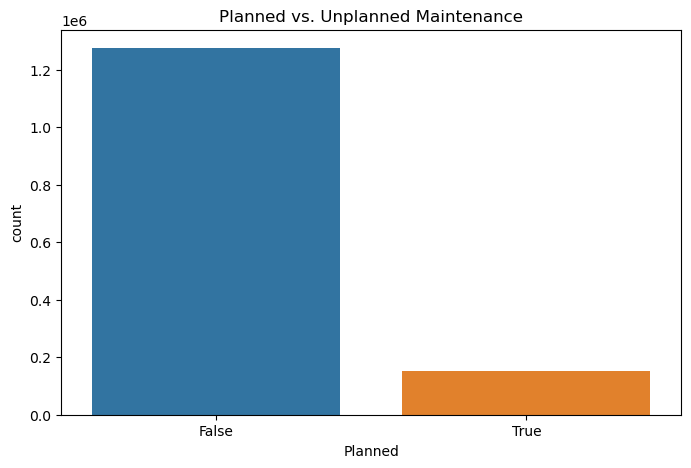

In [19]:
# Plot planned vs unplanned maintenance
plt.figure(figsize=(8, 5))
sns.countplot(x='Planned', data=df)
plt.title('Planned vs. Unplanned Maintenance')
plt.show()

What is the proportion of planned to unplanned maintenance at each plant?

In [24]:
# Calculate the proportion of planned maintenance for each plant
df.groupby('PRODUCTION_LOCATION')['MAINTENANCE_PLAN'].apply(lambda x: x.notnull().mean()).sort_values(ascending=False)

PRODUCTION_LOCATION
ROMA           0.268677
COTA           0.226495
MONZA          0.225392
MONACO         0.096229
SUZUKA         0.062593
SILVERSTONE    0.044156
Name: MAINTENANCE_PLAN, dtype: float64

The ROMA, COTA, and MOZDA locations have the highest proportion of unplanned maintenance.

 What types of maintenance activities are most common?

In [39]:
# Count the frequency of each type of maintenance activity
df['MAINTENANCE_TYPE_DESCRIPTION'].value_counts()

MAINTENANCE_TYPE_DESCRIPTION
Preventive Maintenance Order    151533
Corrective Maintenance Order    134074
Administrative Order              6161
Capital Order                       22
Breakdown Maintenance Order          5
Name: count, dtype: int64

What does the overall maintenance activity look like across plants (both planned and unplanned)?

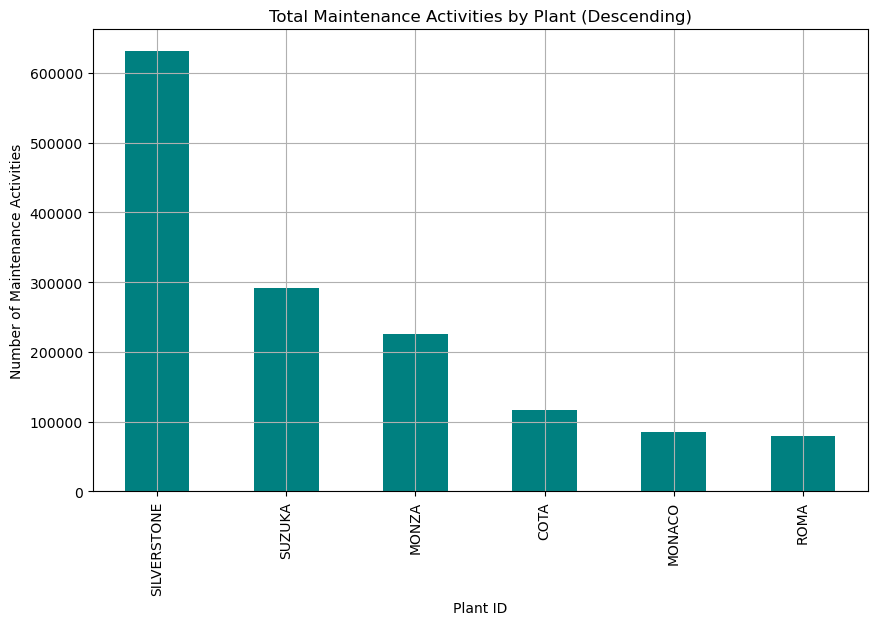

In [23]:
# Group by plant and count the total number of maintenance activities (planned and unplanned)
maintenance_by_plant = df.groupby('PRODUCTION_LOCATION')['ORDER_ID'].count().sort_values(ascending=False)

# Plot the maintenance activities by plant (in descending order)
plt.figure(figsize=(10,6))
maintenance_by_plant.plot(kind='bar', color='teal')
plt.title("Total Maintenance Activities by Plant (Descending)")
plt.xlabel("Plant ID")
plt.ylabel("Number of Maintenance Activities")
plt.grid(True)
plt.show()

This is interesting - Silverstone has substantially more maintenence acitivities recorded than other plants (more than twice as many). This will be something to explore later.

How long does it take to perfom maintenance at each plant?

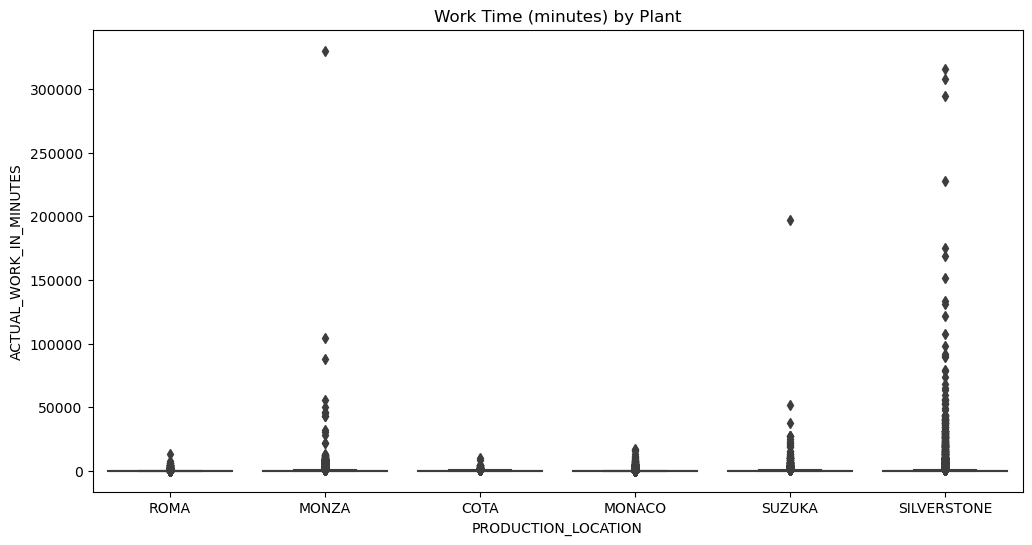

In [25]:
# Time taken to resolve issues (by plant)
plt.figure(figsize=(12, 6))
sns.boxplot(x='PRODUCTION_LOCATION', y='ACTUAL_WORK_IN_MINUTES', data=df)
plt.title('Work Time (minutes) by Plant')
plt.show()

Not only does Silverstone have substantially more maintenence acitivities recorded, but the time it took in minutes to perform maintenance was also longer at that plant. This could be due to the size of the plant.

Is there a difference in the amount of time it takes to perform maintenence planned vs unplanned?

In [26]:
# Calculate the average time taken for planned vs unplanned maintenance
df.groupby(df['MAINTENANCE_PLAN'].notnull())['ACTUAL_WORK_IN_MINUTES'].mean()

MAINTENANCE_PLAN
False    93.129113
True     51.044412
Name: ACTUAL_WORK_IN_MINUTES, dtype: float64

Planned maintenence takes significantly less time than unplanned maintenence (roughly 42 minutes longer).

How do maintenance times vary by equipment type (EQUIP_CAT_DESC)?

In [27]:
# Group by equipment category and calculate the average maintenance time
df.groupby('EQUIP_CAT_DESC')['ACTUAL_WORK_IN_MINUTES'].mean().sort_values(ascending=False)

EQUIP_CAT_DESC
Production resources/tools    259.317073
Test/measurement equipment     78.468750
Plant & Buildings              78.412987
Machines                       72.547352
Name: ACTUAL_WORK_IN_MINUTES, dtype: float64

It seems like production resources/tools have the longest maintenance time, which is to be expected.

Is there a relationship between equipment description and the frequency of planned maintenance?

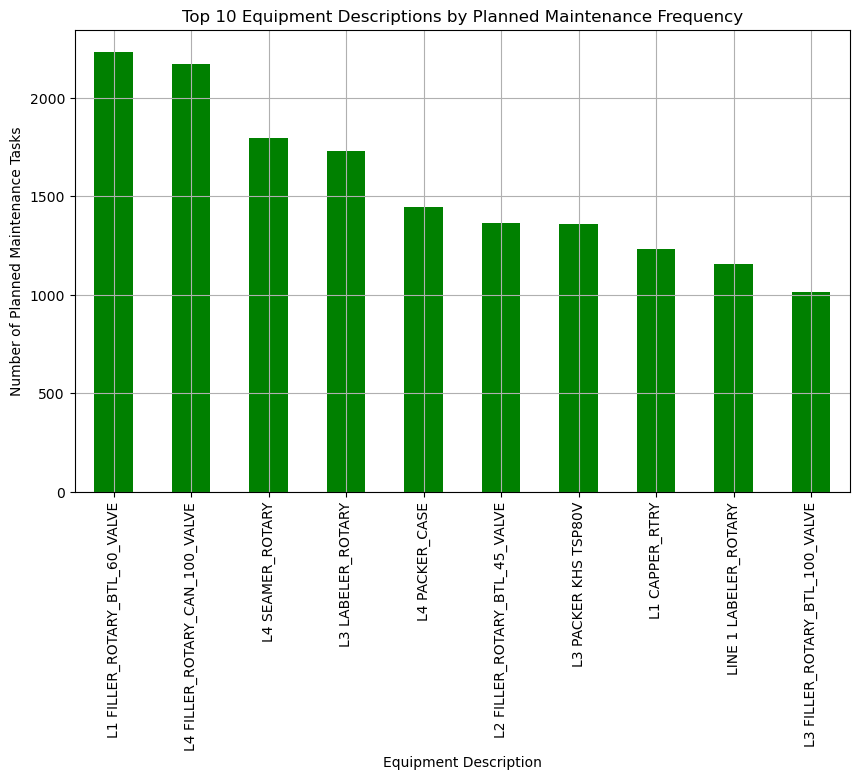

In [28]:
# Filter for planned maintenance (where MAINTENANCE_PLAN is not null)
planned_maintenance = df[df['MAINTENANCE_PLAN'].notnull()]

# Count the number of planned maintenance tasks for each equipment description
planned_by_equipment = planned_maintenance['EQUIPMENT_DESC'].value_counts()

# Plot the top 10 equipment types with the most planned maintenance
planned_by_equipment.head(10).plot(kind='bar', color='green', figsize=(10,6))
plt.title("Top 10 Equipment Descriptions by Planned Maintenance Frequency")
plt.xlabel("Equipment Description")
plt.ylabel("Number of Planned Maintenance Tasks")
plt.grid(True)
plt.show()

There are definitely certain pieces of equipment that seems to require more frequent maintenance (notably valves and rotaries).

Is there a relationship between equipment description and the frequency of unplanned maintenance?

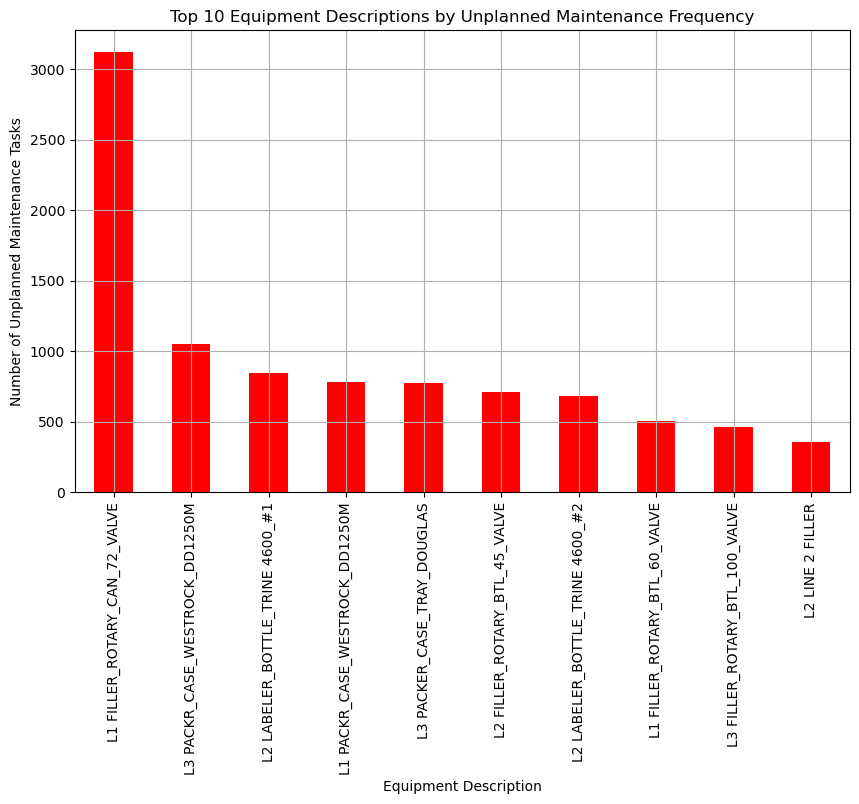

In [29]:
# Filter for unplanned maintenance (where MAINTENANCE_PLAN is null)
unplanned_maintenance = df[df['MAINTENANCE_PLAN'].isnull()]

# Count the number of unplanned maintenance tasks for each equipment description
unplanned_by_equipment = unplanned_maintenance['EQUIPMENT_DESC'].value_counts()

# Plot the top 10 equipment types with the most unplanned maintenance
unplanned_by_equipment.head(10).plot(kind='bar', color='red', figsize=(10,6))
plt.title("Top 10 Equipment Descriptions by Unplanned Maintenance Frequency")
plt.xlabel("Equipment Description")
plt.ylabel("Number of Unplanned Maintenance Tasks")
plt.grid(True)
plt.show()

The L1_filter_rotary_can_72 valve has a significantly higher unplanned maintenance frequency compared to other parts.

Are there any machines in particular that are more likely to recieve unplanned maintenence?

In [30]:
# Filter for unplanned maintenance
unplanned_maintenance = df[df['MAINTENANCE_PLAN'].isnull()]

# Group by equipment ID and count the number of unplanned maintenance incidents for each piece of equipment
equipment_unplanned_count = unplanned_maintenance.groupby('EQUIPMENT_DESC')['ORDER_ID'].count()

# Sort to find the equipment with the highest incidence of unplanned maintenance
equipment_unplanned_count.sort_values(ascending=False)

EQUIPMENT_DESC
L1 FILLER_ROTARY_CAN_72_VALVE        3120
L3 PACKR_CASE_WESTROCK_DD1250M       1049
L2 LABELER_BOTTLE_TRINE 4600_#1       848
L1 PACKR_CASE_WESTROCK_DD1250M        782
L3 PACKER_CASE_TRAY_DOUGLAS           773
                                     ... 
LAB_EQUIP_DENSITY_METER_SYRUP_LAB       1
LAB_EQUIP_INCUBATOR#2                   1
LAB_EQUIP_TORQUE_METER                  1
CIP TANK                                1
CO2_SYS_HEATER_2                        1
Name: ORDER_ID, Length: 747, dtype: int64

The above provides us with a more detailed list/can allow us to zero in on the machines causing the most trouble in regards to unplanned maintenence.

Are there specific production lines or areas that experience more frequent unplanned maintenance?

In [32]:
# Filter for unplanned maintenance
unplanned_maintenance = df[df['MAINTENANCE_PLAN'].isnull()]

# Group by functional area nodes and count the number of unplanned maintenance occurrences
unplanned_by_functional_node = unplanned_maintenance.groupby('FUNCTIONAL_AREA_NODE_1_MODIFIED')['ORDER_ID'].count()

# Sort to find the functional areas with the highest incidence of unplanned maintenance
unplanned_by_functional_node.sort_values(ascending=False)

FUNCTIONAL_AREA_NODE_1_MODIFIED
COTA PRODUCTION           43845
SILVERSTONE PRODUCTION    34773
PRODUCTION                31205
SUZUKA PRODUCTION         21198
MONZA PRODUCTION           7508
FLEET                       123
COOLER SERVICE                1
Name: ORDER_ID, dtype: int64

We can dive into this further later, but there are definitely functional areas within certain plants that are more likely to receive unplanned maintenence.

In [33]:
# Convery date to datetime format for exploration in later code chunks
df['EXECUTION_START_DATE'] = pd.to_datetime(df['EXECUTION_START_DATE'], errors='coerce')

Are more frequently maintained machines less likely to require unplanned maintenance?

In [34]:
# Calculate the total maintenance frequency for each equipment (both planned and unplanned)
maintenance_frequency = df.groupby('EQUIPMENT_DESC')['ORDER_ID'].count()

# Calculate the proportion of unplanned maintenance for each equipment
proportion_unplanned = df.groupby('EQUIPMENT_DESC')['MAINTENANCE_PLAN'].apply(lambda x: x.isnull().mean())

# Combine the data into a single DataFrame
maintenance_analysis = pd.DataFrame({
    'Maintenance_Frequency': maintenance_frequency,
    'Proportion_Unplanned': proportion_unplanned
})

# Check the correlation between maintenance frequency and unplanned maintenance proportion
correlation = maintenance_analysis.corr().loc['Maintenance_Frequency', 'Proportion_Unplanned']

# Display the result
print(f"Correlation between maintenance frequency and unplanned maintenance: {correlation:.2f}")

Correlation between maintenance frequency and unplanned maintenance: -0.28


A correlation of -0.28 shows a weak negative relationship between maintenance frequency and unplanned maintenance. While it's heading in the expected direction (more frequent maintenance seems to reduce unplanned maintenance), the effect isn't that strong. It suggests there's likely more at play here than just how often the machines are maintained.

Does older equipment experience more unplanned downtime?

In [36]:
# Convert dates to datetime format
df['EQUIP_START_UP_DATE'] = pd.to_datetime(df['EQUIP_START_UP_DATE'], errors='coerce')

# Check if there are any invalid dates (NaT values) after conversion
invalid_dates = df['EQUIP_START_UP_DATE'].isna().sum()
print(f"Number of invalid start-up dates: {invalid_dates}")

# Calculate equipment age (difference between today and start-up date) in years
today = pd.to_datetime(datetime.datetime.now().date())
df['Equipment_Age'] = (today - df['EQUIP_START_UP_DATE']).dt.days / 365  # Age in years

# Compare the average age for planned vs. unplanned maintenance
average_age_by_maintenance = df.groupby(df['MAINTENANCE_PLAN'].notnull())['Equipment_Age'].mean()

print("Average equipment age (in years) for planned vs. unplanned maintenance:")
print(average_age_by_maintenance)


Number of invalid start-up dates: 1347817
Average equipment age (in years) for planned vs. unplanned maintenance:
MAINTENANCE_PLAN
False    6.956723
True     7.424273
Name: Equipment_Age, dtype: float64


There are so many missing values in the column (also shown in the .info() viewed near the beginning of the notebook), so I don't think we can pull too much meaning from this output.  That being said, I was expecting older machines to need more maintenance - but the difference is marginal.

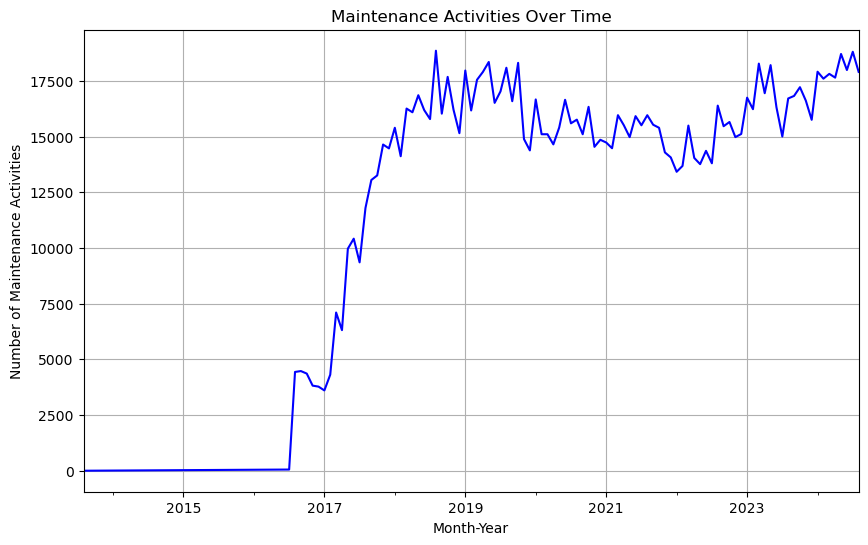

In [37]:
# Convert EXECUTION_START_DATE to datetime if not already
df['EXECUTION_START_DATE'] = pd.to_datetime(df['EXECUTION_START_DATE'], errors='coerce')

# Group maintenance activities by month and year
maintenance_over_time = df.groupby(df['EXECUTION_START_DATE'].dt.to_period('M'))['ORDER_ID'].count()

# Plot maintenance activities over time
maintenance_over_time.plot(kind='line', figsize=(10,6), color='blue')
plt.title("Maintenance Activities Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Number of Maintenance Activities")
plt.grid(True)
plt.show()

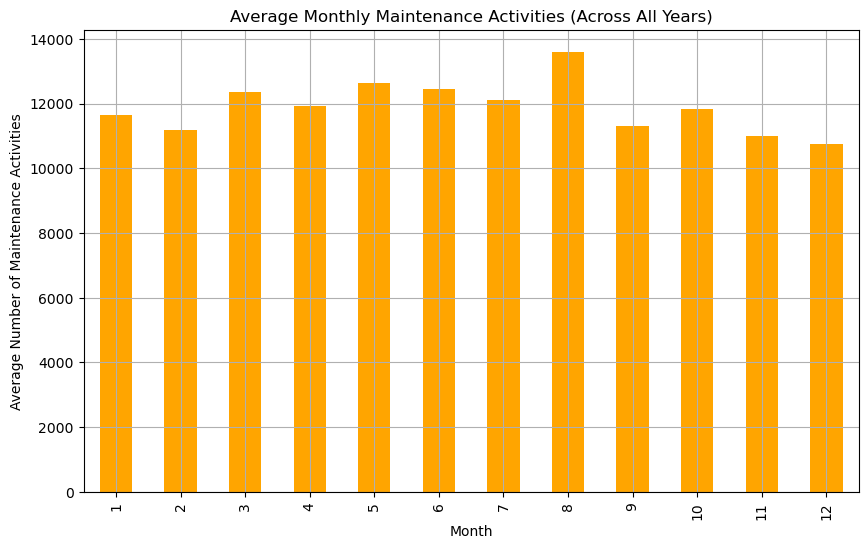

In [38]:
# Convert EXECUTION_START_DATE to datetime if not already done
df['EXECUTION_START_DATE'] = pd.to_datetime(df['EXECUTION_START_DATE'], errors='coerce')

# Extract month and year from the start date
df['Month'] = df['EXECUTION_START_DATE'].dt.month
df['Year'] = df['EXECUTION_START_DATE'].dt.year

# Group by month and calculate the average number of maintenance activities per month across all years
monthly_maintenance_avg = df.groupby('Month')['ORDER_ID'].count() / df['Year'].nunique()

# Plot the monthly averages
plt.figure(figsize=(10,6))
monthly_maintenance_avg.plot(kind='bar', color='orange')
plt.title("Average Monthly Maintenance Activities (Across All Years)")
plt.xlabel("Month")
plt.ylabel("Average Number of Maintenance Activities")
plt.grid(True)
plt.show()

In [45]:
# Find all duplicated ORDER_IDs (this will show all rows where ORDER_ID is duplicated)
duplicates = df[df.duplicated(subset='ORDER_ID', keep=False)]

# Sort the duplicates by ORDER_ID to see all occurrences together
duplicates_sorted = duplicates.sort_values('ORDER_ID')

# Display the sorted duplicates
print(duplicates_sorted)

             ORDER_ID PLANT_ID PRODUCTION_LOCATION EXECUTION_START_DATE  \
1211092     206978909     G221              SUZUKA           2022-04-25   
322565      206978909     G291               MONZA           2022-04-20   
1207673     206982947     G221              SUZUKA           2022-04-25   
218259      206982947     G291               MONZA           2022-04-21   
558917      207502235     G291               MONZA           2022-10-19   
1266167     207502235     G221              SUZUKA           2022-10-19   
1323117     207541571     G291               MONZA           2022-10-19   
205842      207541571     G221              SUZUKA           2022-10-19   
655425      207541573     G221              SUZUKA           2022-10-19   
1163561     207541573     G291               MONZA           2022-10-19   
896321      207550199     G291               MONZA           2022-10-20   
244289      207550199     G221              SUZUKA           2022-10-20   
572112      207554214    

In [44]:
# Check the data type of ORDER_ID
print(df['ORDER_ID'].dtype)

int64
